<a href="https://colab.research.google.com/github/DuarteMagano/AcademiaDeFisica/blob/main/tutorial_professor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install qiskit==1.3.2 pylatexenc
%pip install qiskit-ibm-runtime==0.35.0
# este notebook foi testado para a versão do qiskit 1.3.2 e a versão do qiskit-ibm-runtime 0.35.0

# Introdução à Informação Quântica

## Estados quânticos

In [ ]:
import numpy as np

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [ ]:
# criar um objeto "Statevector", chamado u
psi = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])

In [ ]:
# representar u em latex
psi.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# representação raw
psi.draw()

'Statevector([0.70710678+0.j, 0.70710678+0.j],\n            dims=(2,))'

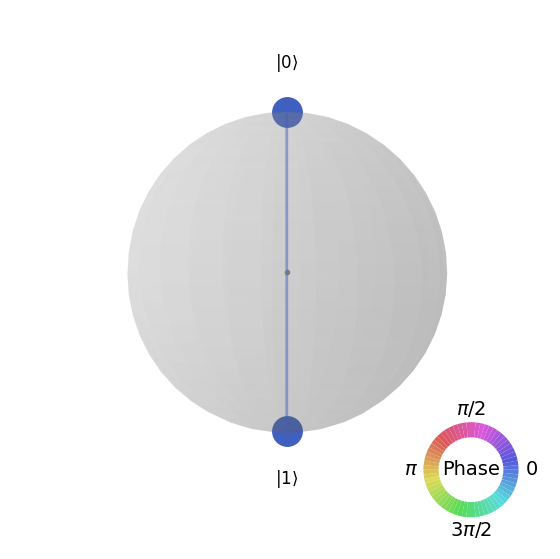

In [ ]:
# representação gráfica
psi.draw("qsphere")

In [ ]:
# verificar se psi está normalizado
print(f"{psi.is_valid()}")

True


In [ ]:
outcome, state = psi.measure()
print(f"{outcome = }")
print("Pre-measurement state:"); display(psi.draw("latex")) # psi não é modificado pela medição
print("Post-measurement state:"); display(state.draw("latex"))

outcome = np.str_('1')
Pre-measurement state:


<IPython.core.display.Latex object>

Post-measurement state:


<IPython.core.display.Latex object>

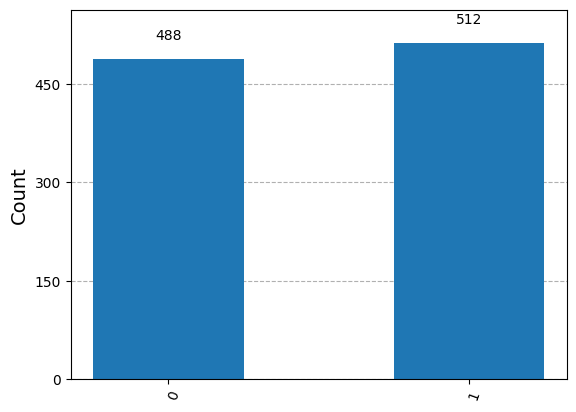

In [ ]:
statistics = psi.sample_counts(1000)
plot_histogram(statistics)

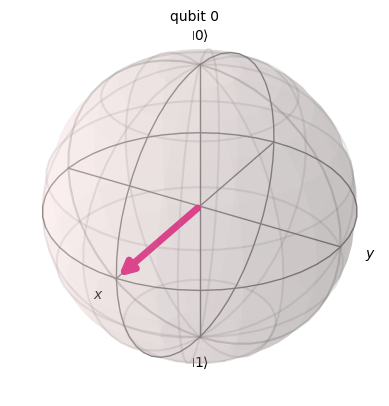

In [ ]:
plot_bloch_multivector(psi)

In [ ]:
# também podemos criar um estado da base computacional desta forma
state = Statevector.from_label('0')
state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
state = Statevector.from_label('1')
state.draw("latex")

<IPython.core.display.Latex object>

## Operações quânticas

In [ ]:
from qiskit.quantum_info import Operator

In [ ]:
# criar um operador a partir da sua representação matricial
U = Operator(np.array([[0., 1.],
                       [1., 0.]]))

In [ ]:
U.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
U.num_qubits

1

In [ ]:
U.is_unitary()

True

In [ ]:
U2 = Operator(np.array([[2., 2.],
                        [1., 0.]]))

U2.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# podemos criar operadores a partir de nomes standard
X = Operator.from_label("X")
X.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# podemos criar operadores a partir de nomes standard
H = Operator.from_label("H")
H.draw("latex")

<IPython.core.display.Latex object>

## Circuitos quânticos

In [ ]:
from qiskit import QuantumCircuit

from qiskit.primitives import StatevectorSampler
from qiskit import QuantumRegister, ClassicalRegister

In [ ]:
# criamos um objecto do tipo "QuantumCircuit" com um qubit
qc = QuantumCircuit(1)

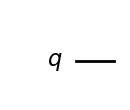

In [ ]:
qc.draw('mpl') # mpl para termos desenhos melhores

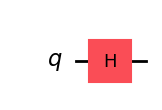

In [ ]:
qc.h(0) # adicionar uma porta "H" ao circuito
qc.draw('mpl')

In [ ]:
# calcular o estado no fim do circuito
state = Statevector(qc)
state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# criamos um circuito com um registo quântico de um qubit e um registo clássico de um bit (para guardard o resultado das medições)
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')
qc = QuantumCircuit(qreg, creg)

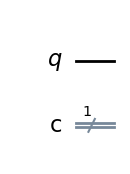

In [ ]:
qc.draw('mpl')

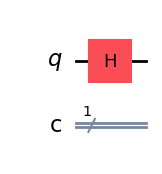

In [ ]:
qc.h(qreg) # adicionar uma porta H
qc.draw('mpl')

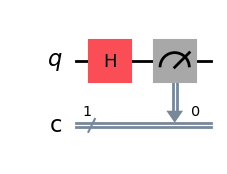

In [ ]:
qc.measure(qreg, creg) # medimos o qreg e registamos o resultado no creg
qc.draw("mpl")

In [ ]:
# definir o método de avaliação do circuito
sampler = StatevectorSampler()

In [ ]:
job = sampler.run([qc], shots=1000)

In [ ]:
results = job.result()[0] # o índice "0" é necessário porque podemos correr mais do que um circuito num job
counts = results.data.c.get_counts() # o atributo "c" refere-se ao registo clássico

In [ ]:
print(f"{counts = }")

counts = {'1': 508, '0': 492}


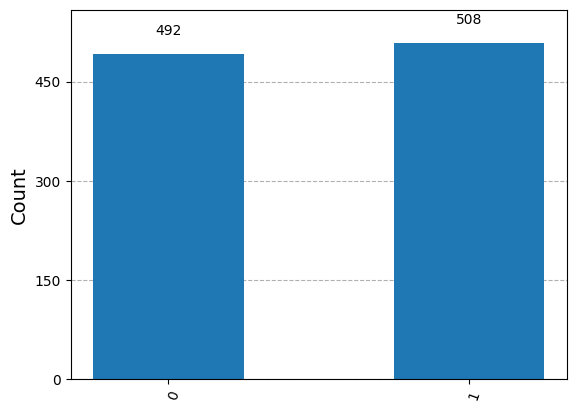

In [ ]:
plot_histogram(counts)

# BB84

## Demonstração de princípio

In [ ]:
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2

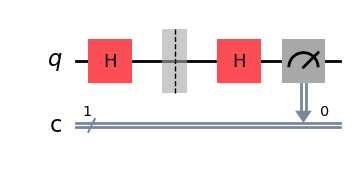

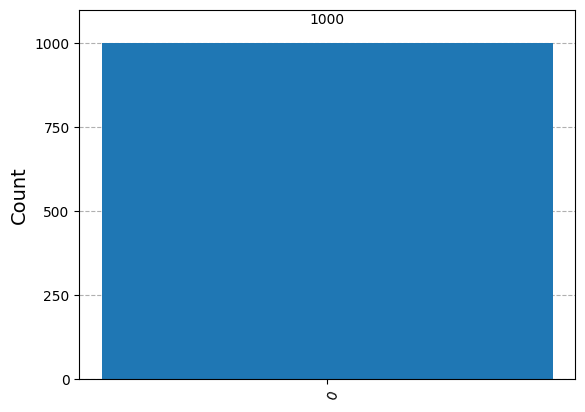

In [ ]:
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')
qc = QuantumCircuit(qreg, creg)

# Alice prepara o seu qubit no estado |+>
qc.h(qreg)
qc.barrier()

# Alice envia o seu qubit para o Bob
# que o mede na base X
qc.h(qreg)
qc.measure(qreg, creg)

# representar o circuito
display(qc.draw("mpl"))

# correr simulação
sampler = StatevectorSampler()
job = sampler.run([qc], shots=1000)
results = job.result()[0]
counts = results.data.c.get_counts()

# mostrar estatística
plot_histogram(counts)

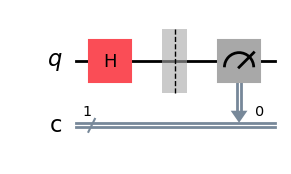

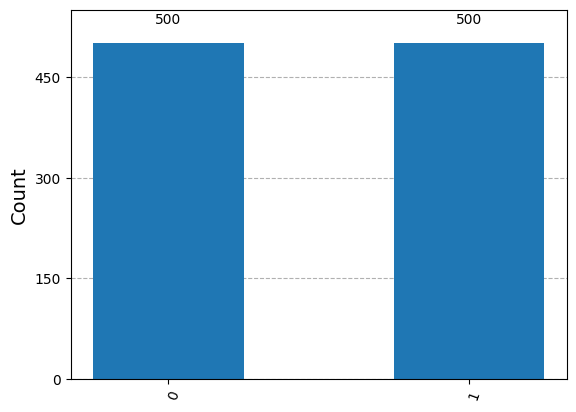

In [ ]:
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')
qc = QuantumCircuit(qreg, creg)

# Alice prepara o seu qubit no estado |+>
qc.h(qreg)
qc.barrier()

# Alice envia o seu qubit para o Bob
# que o mede na base Z
qc.measure(qreg, creg)

# representar o circuito
display(qc.draw("mpl"))

# correr simulação
sampler = StatevectorSampler()
job = sampler.run([qc], shots=1000)
results = job.result()[0]
counts = results.data.c.get_counts()

# mostrar estatística
plot_histogram(counts)

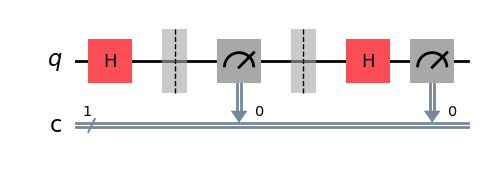

/usr/local/lib/python3.11/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:975: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


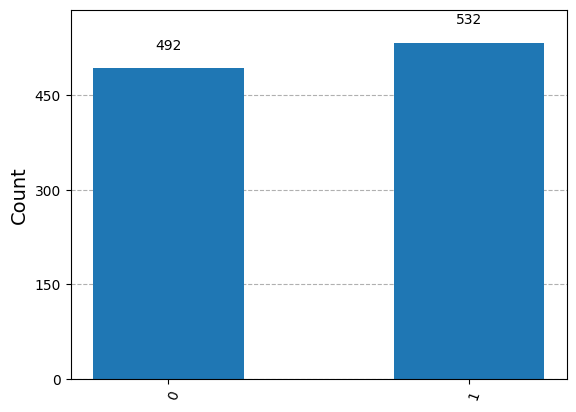

In [ ]:
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')
qc = QuantumCircuit(qreg, creg)

# Alice prepara o seu qubit no estado |+>
qc.h(qreg)
qc.barrier()

# a Eve interseta o qubit e mede-o na base Z
qc.measure(qreg, creg)
qc.barrier()

# a Eve envia o qubit para o Bob
# que o mede na base X
qc.h(qreg)
qc.measure(qreg, creg)

# representar o circuito
display(qc.draw("mpl"))

# o método que estamos até agora, o StatevectorSampler, não permite medições a meio do circuito
# usamos em alternativa o seguinte método
backend = GenericBackendV2(num_qubits=2)
transpiled_circuit = transpile(qc, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()

# mostrar estatística
plot_histogram(counts)

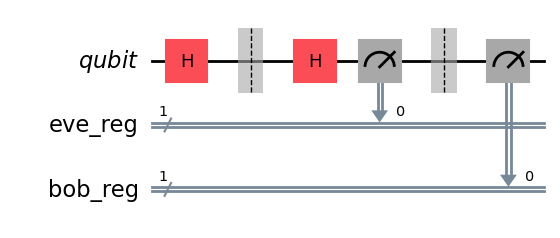

/usr/local/lib/python3.11/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:975: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


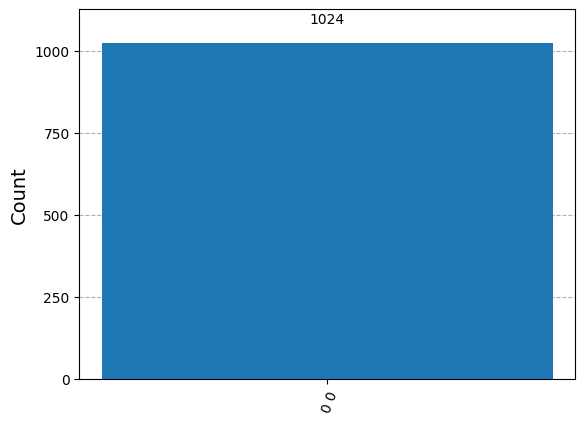

In [ ]:
qreg = QuantumRegister(1, 'qubit')
ereg = ClassicalRegister(1, 'eve_reg')
breg = ClassicalRegister(1, 'bob_reg')
qc = QuantumCircuit(qreg, ereg, breg)

# Alice prepara o seu qubit no estado |+>
qc.h(qreg)
qc.barrier()

# a Eve interseta o qubit e mede-o na base X
qc.h(qreg)
qc.measure(qreg, ereg)
qc.barrier()

# a Eve envia o qubit para o Bob
# que o mede na base Z
qc.measure(qreg, breg)

# representar o circuito
display(qc.draw("mpl"))

backend = GenericBackendV2(num_qubits=2)
transpiled_circuit = transpile(qc, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()

# mostrar estatística
plot_histogram(counts)

## Protocol

In [ ]:
from numpy.random import randint

In [ ]:
# fixar seed
np.random.seed(seed = 0)

In [ ]:
n = 100 # número de qubit comunicados

In [ ]:
# Parte I: Alice gera bits

alice_bits = randint(2, size = n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [ ]:
# Parte II: Alice escolhe base

alice_bases = randint(2, size=n) # 0 <-> base Z e 1 <-> base X
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [ ]:
def encode_message(bits, bases):
    "Lista de circuitos quânticos que preparam o estado determinado pela Alice"

    message = []

    qreg = QuantumRegister(1, 'qubit')
    ereg = ClassicalRegister(1, 'eve_reg')
    breg = ClassicalRegister(1, 'bob_reg')

    for i in range(n):

        qc = QuantumCircuit(qreg, ereg, breg)

        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass
            else:
                qc.x(qreg)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(qreg)
            else:
                qc.x(qreg)
                qc.h(qreg)

        qc.barrier()
        message.append(qc)

    return message

message = encode_message(alice_bits, alice_bases)

bit = 1
base Alice = 1


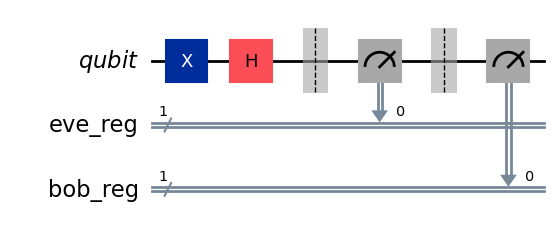

In [ ]:
# exemplo

index = 7

print('bit = %i' % alice_bits[index])
print('base Alice = %i' % alice_bases[index])

message[index].draw('mpl')

In [ ]:
# Parte III: entra a Eve

eavesdropping = True

def eavesdropper(message, eavesdropping):

    if not eavesdropping:
        pass

    else:
        for q in range(n):
            message[q].measure(qreg,ereg)
            message[q].barrier()

eavesdropper(message, eavesdropping)

bit = 1
base Alice = 1


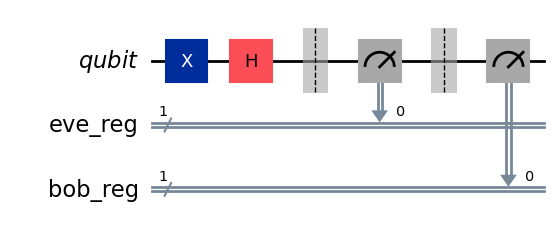

In [ ]:
# exemplo

index = 7

print('bit = %i' % alice_bits[index])
print('base Alice = %i' % alice_bases[index])

message[index].draw('mpl')

In [ ]:
# Parte IV: o Bob mede na sua base
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [ ]:
def bob_measures(message, basis):

    for q in range(n):

        if basis[q] == 0: # measuring in Z-basis
            message[q].measure(qreg, breg)

        if basis[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(qreg, breg)


bob_measures(message, bob_bases)

bit = 1
base Alice = 1
base Bob = 0


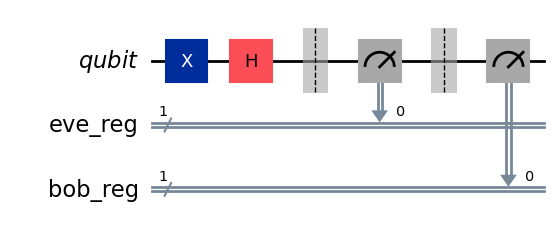

In [ ]:
# exemplo

index = 7

print('bit = %i' % alice_bits[index])
print('base Alice = %i' % alice_bases[index])
print('base Bob = %i' % bob_bases[index])

message[index].draw('mpl')

# Qiskit runtime

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from google.colab import userdata

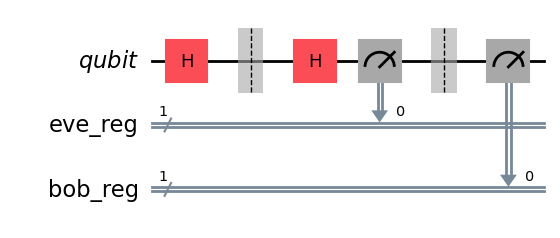

In [ ]:
qreg = QuantumRegister(1, 'qubit')
ereg = ClassicalRegister(1, 'eve_reg')
breg = ClassicalRegister(1, 'bob_reg')
qc = QuantumCircuit(qreg, ereg, breg)

# Alice prepara o seu qubit no estado |+>
qc.h(qreg)
qc.barrier()

# a Eve interseta o qubit e mede-o na base X
qc.h(qreg)
qc.measure(qreg, ereg)
qc.barrier()

# a Eve envia o qubit para o Bob
# que o mede na base Z
qc.measure(qreg, breg)

qc.draw("mpl")

In [ ]:
TOKEN = userdata.get('TOKEN') # cada um tem de inserir o token associado à sua conta IBM Quantum (eu tenho o meu guardado na userdata do Colab)
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

In [ ]:
# escolher o backend menos usado neste momento
backend = service.least_busy(operational=True, simulator=False)
print(f"{backend.name =}, {backend.num_qubits = }")

backend.name ='ibm_brisbane', backend.num_qubits = 127


In [ ]:
pass_manager = generate_preset_pass_manager(
    backend=backend,
    optimization_level=1
)

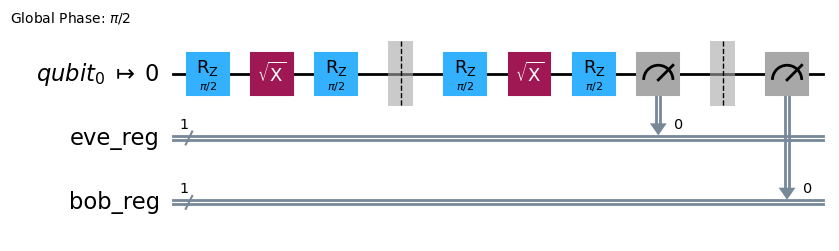

In [ ]:
# Transpile circuit
isa_qc = pass_manager.run(qc)
isa_qc.draw('mpl', idle_wires=False)

In [ ]:
sampler = SamplerV2(backend)

In [ ]:
job = sampler.run([isa_qc], shots=128) # correr 128 runs do circuito
job.job_id()

'czwspcsd8drg008hqaf0'

In [ ]:
# primeiro, o status é "QUEUED"
# depois, passará a "RUNNING"
# quando concluído, será "DONE"
job.status()

'DONE'

In [ ]:
results = job.result()[0]
eve_counts = results.data.eve_reg.get_counts()
bob_counts = results.data.bob_reg.get_counts()

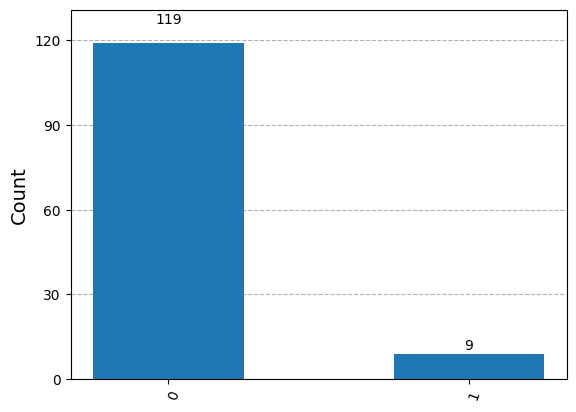

In [ ]:
plot_histogram(eve_counts)

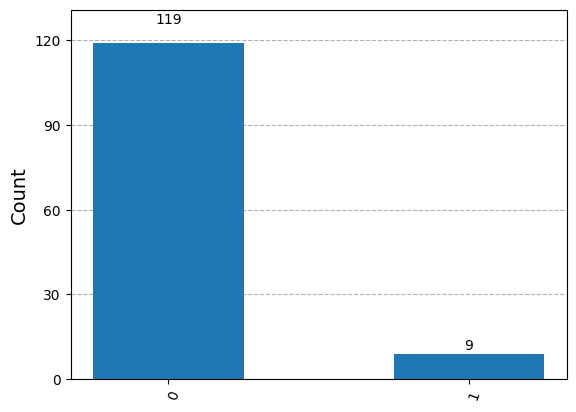

In [ ]:
plot_histogram(eve_counts)

In [ ]:
# agora vamos correr todos os circuitos gerados num único job

TOKEN = userdata.get('TOKEN')
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

backend = service.least_busy(operational=True, simulator=False)
print(f"{backend.name =}, {backend.num_qubits = }")

pass_manager = generate_preset_pass_manager(
    backend=backend,
    optimization_level=1
)

isa_message = pass_manager.run(message)

sampler = SamplerV2(backend)

job = sampler.run([isa_message], shots=1) # !!! ERRO - o que está a falhar? !!!
print(f"{job.job_id() =}")

backend.name ='ibm_brisbane', backend.num_qubits = 127


ValueError: The length of pub must be 1, 2 or 3, but length 100 is given.